## Symmetric Network

If A is related to B, B is also related to A.

The first network of actors is a symmetric network because the relationship **"working together in a movie"** is a symmetric relationship


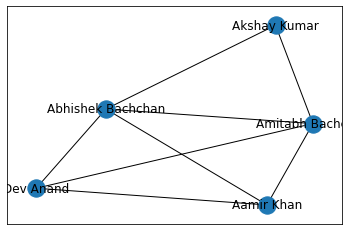

In [ ]:
import networkx as nx

G_symmetric=nx.Graph()

G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

nx.draw_networkx(G_symmetric)

## Asymmetric 

If A is the child of B, then B is not a child of A

What if the relationship between nodes is 'child of', then the relationship is no longer symmetric. 

We can build the asymmetric network in NetworkX using DiGraph method, which is short of Directional Graph


{'A': array([0.22668196, 0.07017683]),
 'B': array([0.47219339, 0.62186592]),
 'C': array([ 0.73456181, -0.25897006]),
 'D': array([-0.43343715, -0.13123582]),
 'E': array([-1.        , -0.30183687])}

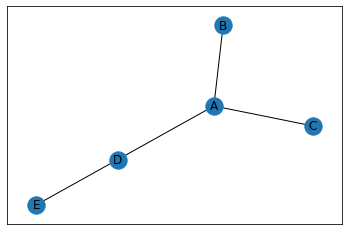

In [ ]:
G_asymmetric=nx.Graph()

G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

nx.draw_networkx(G_asymmetric)
nx.spring_layout(G_asymmetric)

- It is possible that nodes do not separate out and are distinctly visible in the network drawn. 
- To take care of this, we can use the function to force a layout, which positions the nodes in a manner that we can distinctly see them.
- We can accomplish this using spring_layout() function

## Weighted networks

-  if in our initial network we consider the number of movies done together as a weight, we will get a Weighted Network. 

- Let us make one again of the actors, but this time we add weight to the network, each edge has a weight signifying the number of movies they have done together.

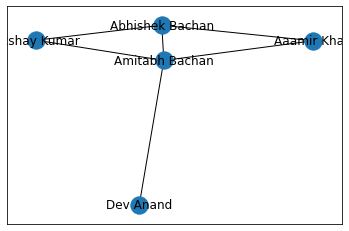

In [ ]:
G_weighted=nx.Graph()
G_weighted.add_edge('Amitabh Bachan','Abhishek Bachan', weight=25)
G_weighted.add_edge('Amitabh Bachan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachan', 'Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachan', 'Aaamir Khan',weight=4)
G_weighted.add_edge('Abhishek Bachan','Akshay Kumar', weight=7)

nx.draw_networkx(G_weighted)

## MultiGraph

- Relation of neighbor between two nodes 'A' and 'B' using relation attribute . If within a network two nodes are connected with two different edges (relations) we have a multigraph. 
- We can make a multigraph utilizing the MultiGraph class.


In [ ]:
G=nx.MultiGraph()
G.add_edge('A','B',relation='neighbor')
G.add_edge('B','C',relation='friend')
G.add_edge('B','C',relation='neighbor')
G.add_edge('D','C',relation='friend')

G.edges()

MultiEdgeDataView([('A', 'B'), ('B', 'C'), ('B', 'C'), ('C', 'D')])

# Network Connectivity

## Degree

- The number of connections a node has. 
- NetworkX has the function degree which we can use to determine the degree of a node in the network.


In [ ]:
nx.degree(G_weighted, 'Dev Anand')

1

This will return a value of 1, as Dev Anand has worked with only three actors in the network.

In [ ]:
nx.degree(G_weighted, 'Amitabh Bachan')

4

## Clustering Coefficient

- People who share connections in a social network tend to form associations. 
- In other words, there is a tendency in a social network to form clusters. 
- We can determine the clusters of a node, Local Clustering Coefficient, which is the fraction of pairs of the node's friends (that is connections) that are connected with each other. 
- To determine the local clustering coefficient, we make use of nx.clustering(Graph, Node) function.

In [ ]:
nx.average_clustering(G_symmetric)

0.8666666666666666

In [ ]:
nx.clustering(G_weighted,'Abhishek Bachan')

0.6666666666666666

In [ ]:
nx.clustering(G_symmetric,'Dev Anand')

1.0

## Distance
- We can also determine the shortest path between two nodes and its length in NetworkX using nx.shortest_path(Graph, Node1, Node2) and nx.shortest_path_length(Graph, Node1, Node2) functions respectively.



In [ ]:
nx.shortest_path(G_symmetric,'Dev Anand','Akshay Kumar')

['Dev Anand', 'Amitabh Bachchan', 'Akshay Kumar']

In [ ]:
nx.shortest_path(G_weighted,'Dev Anand', 'Abhishek Bachan')

['Dev Anand', 'Amitabh Bachan', 'Abhishek Bachan']

- We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node. 

- networkX provides the function bfs_tree to do it

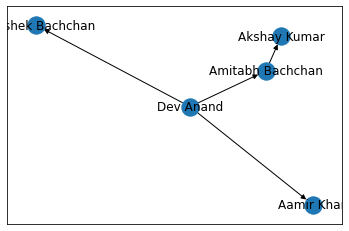

In [ ]:
T=nx.bfs_tree(G_symmetric,'Dev Anand')
nx.draw_networkx(T)

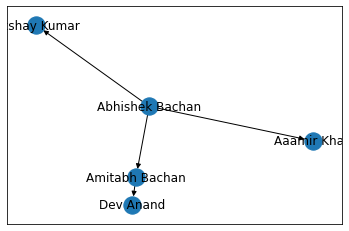

In [ ]:
T=nx.bfs_tree(G_weighted,'Abhishek Bachan')
nx.draw_networkx(T)

## Eccentricity

- Eccentricity of a node A is defined as the largest distance between A and all other nodes. It can be found using nx.eccentricity() function. 
- In the symmetric Actor-network, Dev Anand has an eccentricity of 2, and Abhishek Bachchan has an eccentricity of 1 (It is connected to all).



In [ ]:
nx.eccentricity(G_symmetric)

{'Aamir Khan': 2,
 'Abhishek Bachchan': 1,
 'Akshay Kumar': 2,
 'Amitabh Bachchan': 1,
 'Dev Anand': 2}

## Network Influencers

- To find the most important nodes (individuals) in the network. These parameters are called as centrality measures.

- Centrality Measures can help us in identifying popularity, most liked, and biggest influencers within the network.

### Degree Centrality
- The people most popular or more liked usually are the ones who have more friends. 
- Degree centrality is a measure of the number of connections a particular node has in the network. 
- It is based on the fact that important nodes have many connections. 
- NetworkX has the function degree_centrality() to calculate the degree centrality of all the nodes of a network.

In [ ]:
nx.degree_centrality(G)

{'A': 0.6666666666666666,
 'B': 1.0,
 'C': 0.6666666666666666,
 'D': 0.3333333333333333}

## Eigenvector Centrality

- It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node. 

- It decides that a node is important if it is connected to other important nodes. 

- We can use the eigenvector_centrality() function of NetworkX to calculate eigenvector centrality of all the nodes in a network.

In [ ]:
nx.eigenvector_centrality(G_symmetric)

{'Aamir Khan': 0.43904190094642953,
 'Abhishek Bachchan': 0.5100364187624349,
 'Akshay Kumar': 0.3069366734339046,
 'Amitabh Bachchan': 0.5100364187624349,
 'Dev Anand': 0.43904190094642953}

### Betweenness Centrality
- The Betweenness Centrality is the centrality of control. 
- It represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points. 
- It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. 
- The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. 
- The nodes with high betweenness centrality can have a strategic control and influence on others. 
- An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.
- It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.

# Demo

- for our analysis here we will use Facebook combined ego networks dataset, it contains the aggregated network of ten individuals’ Facebook friends list. 
- You can download the required facebook_combined.txt file from the [Stanford University site.](https://colab.research.google.com/drive/1IEKPr6ByImgnFgFbb9QeVfDltK2N9J0G#scrollTo=AvNoJy9NZxHD&line=3&uniqifier=1)

None


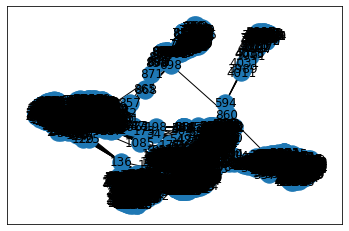

In [ ]:
G_fb=nx.read_edgelist("/content/facebook_combined.txt",create_using=nx.Graph(),nodetype=int)
print(nx.draw_networkx(G_fb))